# Image Compression using SVD

---

##  Objective
- Learn how **Singular Value Decomposition (SVD)** can compress images.
- Keep only the most important singular values to **reduce storage** while preserving most of the image.
- Visualize the effect of compression.

---

##  Concept

1. Every grayscale image can be represented as a **matrix of pixel intensities**.  
2. SVD decomposes the matrix:

$$
A = U \Sigma V^T
$$

- $U$ = left singular vectors  
- $\Sigma$ = singular values (energy/importance)  
- $V^T$ = right singular vectors  

3. Keep **top-k singular values** and reconstruct the image:

$$
A_k = U_k \Sigma_k V_k^T
$$

> Smaller $k$ → higher compression, lower quality  
> Larger $k$ → better quality, less compression  

---

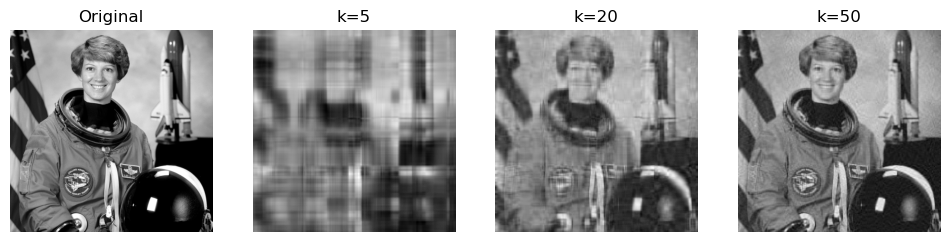

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray

# Load sample image (grayscale)
img = rgb2gray(data.astronaut())  # convert to grayscale
A = np.array(img)

# Compute SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Function to reconstruct image with top k singular values
def reconstruct_image(U, S, VT, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    return U_k @ S_k @ VT_k

# Display original and compressed images
ks = [5, 20, 50]  # different compression levels
plt.figure(figsize=(12,4))

plt.subplot(1, len(ks)+1, 1)
plt.imshow(A, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, k in enumerate(ks):
    A_k = reconstruct_image(U, S, VT, k)
    plt.subplot(1, len(ks)+1, i+2)
    plt.imshow(A_k, cmap='gray')
    plt.title(f'k={k}')
    plt.axis('off')

plt.show()
plt.imsave("original.png", A, cmap="gray")
plt.imsave("compressed_k20.png", A_k, cmap="gray")

In [8]:
import imageio.v2 as imageio

filenames = []
for k in [1,5,10,20,50]:
    A_k = reconstruct_image(U, S, VT, k)
    fname = f"frame_{k}.png"
    plt.imsave(fname, A_k, cmap="gray")
    filenames.append(fname)

# Make GIF
with imageio.get_writer('svd_compression.gif', mode='I', duration=0.8) as writer:
    for fname in filenames:
        image = imageio.imread(fname)
        writer.append_data(image)
